In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
#!conda install cartopy

# Data acquisition

In [3]:
url = 'https://ec.europa.eu/eurostat/databrowser-backend/api/query/1.0/LIVE/xlsx/en/download/8251b83f-a3d4-4912-a85f-fb99276deb71?i'

response = requests.get(url)

if response.status_code == 200:
    with open('nrg_cb_rw__custom_5016253_spreadsheet.xlsx', 'wb') as f:
        f.write(response.content)
    print('data saved')
else:
    print('data not saved', response.status_code, response.text)

data not saved 500 Internal Server Error


# Data Cleaning

In [4]:
#remove columns with all NaN values
def cleanDataFrame(df):
    return df.dropna(axis=1, how='all')

#replace NaN and other non-numeric values with 0, and convert data to numeric type
def getNotNanData(df):
    df = df.replace({'NaN': 0, 'nan': 0,'p':0,'e':0})
    df = df.replace(np.nan, 0)
    for i in range(1,11):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i] ,errors='coerce').fillna(0)
    return df

In [5]:
#filename
file2 = "nrg_cb_rw__custom_5016253_spreadsheet.xlsx"

# Data Analysis

## Q2: What are the primary changes on renewable energy?

### Production of 5 new energy sources in Europe (2012-2021)

In [6]:
#Time frequency	Energy balance	Standard international energy product classification (SIEC)	Unit of measure
# Sheet 1	Annual	Indigenous production	Geothermal	Terajoule
# Sheet 2	Annual	Indigenous production	Solar thermal	Terajoule
# Sheet 3	Annual	Indigenous production	Primary solid biofuels	Terajoule
# Sheet 4	Annual	Indigenous production	Biogases	Terajoule
# Sheet 5	Annual	Indigenous production	Renewable municipal waste	Terajoule

#Geothermal
energy = ['Geothermal','Solar thermal','Primary solid biofuels','Biogases','Renewable municipal waste']
years = [ i for i in  range(2012,2022)]

indigenous_production = []

Geothermal = pd.read_excel(file2, sheet_name = 2,header=8)
Geothermal = cleanDataFrame(Geothermal)
indigenous_production.append(Geothermal.iloc[2,1:11].tolist())

#Solar thermal
Solar = pd.read_excel(file2, sheet_name = 3,header=8)
Solar = cleanDataFrame(Solar)
indigenous_production.append(Solar.iloc[2,1:11].tolist())

#Primary solid biofuels
solidBiofuels = pd.read_excel(file2, sheet_name = 4,header=8)
solidBiofuels = cleanDataFrame(solidBiofuels)
indigenous_production.append(solidBiofuels.iloc[2,1:11].tolist())

#Biogases
Biogases = pd.read_excel(file2, sheet_name =5,header=8)
Biogases = cleanDataFrame(Biogases)
indigenous_production.append(Biogases.iloc[2,1:11].tolist())

#Renewable municipal waste
waste = pd.read_excel(file2, sheet_name = 6,header=8)
waste = cleanDataFrame(waste)
indigenous_production.append(waste.iloc[2,1:11].tolist())

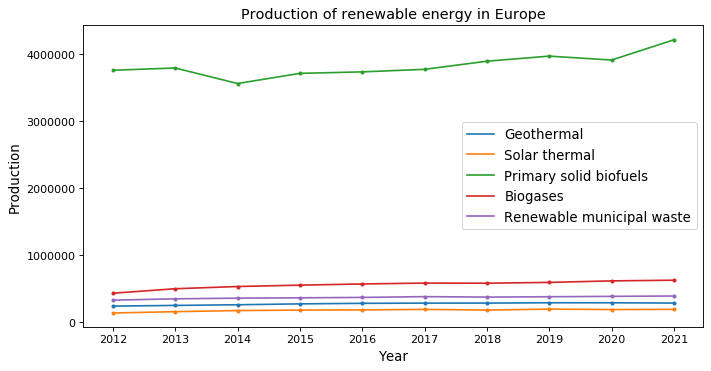

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5), dpi=80)

x = [ i for i in  range(len(years))]
cmap = plt.get_cmap('tab10')

for i in range(len(energy)):
    
    plt.plot(x, indigenous_production[i], label=energy[i],color=cmap(i))
    plt.scatter(x, indigenous_production[i],color=cmap(i),s=7)

plt.xticks(x, years)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Production',fontsize=12)
plt.title('Production of renewable energy in Europe',fontsize=13)
plt.legend(fontsize=12)
plt.show()

These data show a steady increase in capacity for geothermal energy, solar thermal, renewable municipal waste, biogas and biosolid fuels in the EU region from 2012 to 2021. We can say that the investment and development of renewable energy in the EU region has achieved some results, but continued efforts are needed to further promote the development and application of renewable energy.

In [8]:
# bartChart of 2d
def getBartChartOfEnergy(Geothermal,energy_name):
    res = Geothermal.sort_values(by='Unnamed: 19', ascending=False)

    topTen_name = res.iloc[3:13,0].to_list()

    for i in range(10):
        if 'Germany' in topTen_name[i]:
            topTen_name[i]='Germany'
    eng = res.iloc[3:13,10].to_list()

    fig = plt.figure(figsize=(12, 4))

    x = [i for i in range(10)]
    cmap = plt.get_cmap('tab10')

    clors = [cmap(i) for i in range(10)]

    # bar plot
    bars = plt.bar(x, eng,color=clors,alpha=0.5)
    
    
    min_d = 100000000
    max_d = 0
    for i, bar in enumerate(bars):
        if  min_d > bar.get_height():
            min_d = bar.get_height()
        if max_d < bar.get_height():
            max_d = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), eng[i], ha='center', va='bottom',fontsize=10)

        
    plt.xticks(x, topTen_name,rotation=30,fontsize=12)
    plt.title('Top 10 '+energy_name+' energy production in Europe in 2021')
    plt.xlabel('Country',fontsize=12)
    plt.ylim(ymax=max_d*1.2)
    plt.ylabel('Production',fontsize=15)
    
    plt.show()
    return topTen_name,eng


Geothermal = getNotNanData(Geothermal)
Solar = getNotNanData(Solar)
solidBiofuels = getNotNanData(solidBiofuels)
Biogases = getNotNanData(Biogases)
waste = getNotNanData(waste)

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# bartChart of 3d
def get3dBart(new_ten_name,Solar,energy_name):
    
    #xs -year
    #ys -country
    #zs -production

    engs = []
    for name in new_ten_name:
        if 'Germany' in name:
            name = 'Germany (until 1990 former territory of the FRG)'
        eng1 = Solar[ Solar['Unnamed: 0']==name].values.tolist()[0][1:-1]
        print(eng1)
        engs.append(eng1)

    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['lightcoral','lightblue','lightcyan','lightgoldenrodyellow','lightgray','lightgreen','lightpink','lightsalmon','lightseagreen','lightskyblue']

    yticks = [ i for i in range(len(new_ten_name))]


    for c, k,aa in zip(colors,yticks,new_ten_name):

        xs = range(len(engs[k]))
        ys = engs[k]
        cs = [c] * len(xs)
        cs[0] = 'c'
        kk = [k for i in range(len(new_ten_name))]
        ax.bar(xs,ys , zs=k, zdir='y', color=c,alpha = 1-0.03*k)

    ax.set_yticks(yticks)
    

    xs_label = [i for i in range(2012,2022,1)]
    

    plt.yticks(yticks,new_ten_name,fontsize=10)
    plt.xticks(xs,xs_label,fontsize=10,rotation=30)
    plt.title('Top 10 '+energy_name+' energy production in Europe in 2012-2021',fontsize=15)
    plt.show()

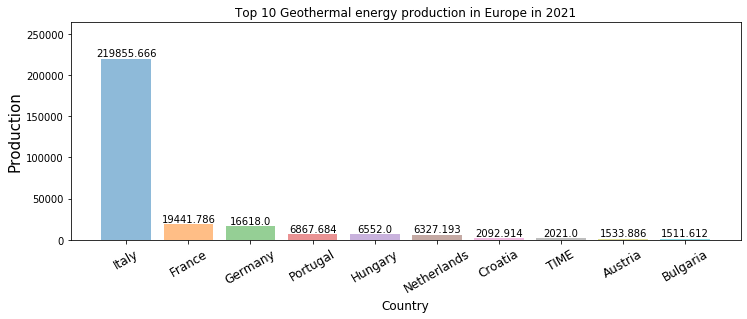

In [10]:
ten_geo,e = getBartChartOfEnergy(Geothermal,energy[0])
ten_geo.reverse()

The data show that the geothermal energy production capacity in Italy is much higher than in other countries, which may be related to the geological characteristics of Italy. Other European countries have lower geothermal energy production capacity, which may be due to the lack of suitable geological conditions or insufficient investment, etc.

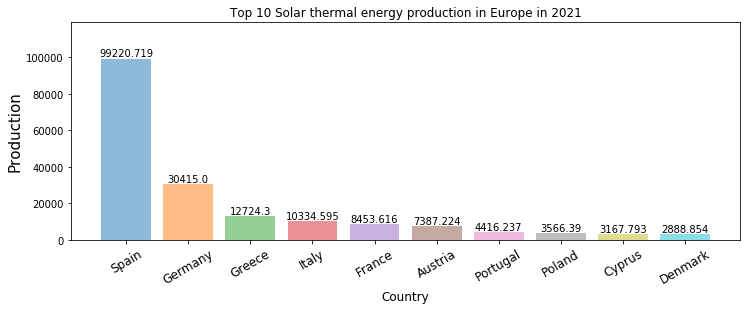

In [11]:
ten_sol,e = getBartChartOfEnergy(Solar,energy[1])
ten_sol.reverse()

Factors such as the country's geographical location, climatic conditions, and policy support can have an impact on the growth of solar power capacity.

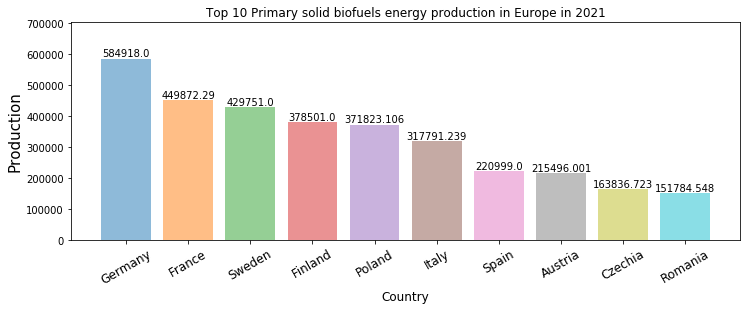

In [12]:
ten_pri, e = getBartChartOfEnergy(solidBiofuels,energy[2])
ten_pri.reverse()

There is a relatively small gap between countries on Primary solid biofuels, indicating that European countries have strong technology and investment in this energy.

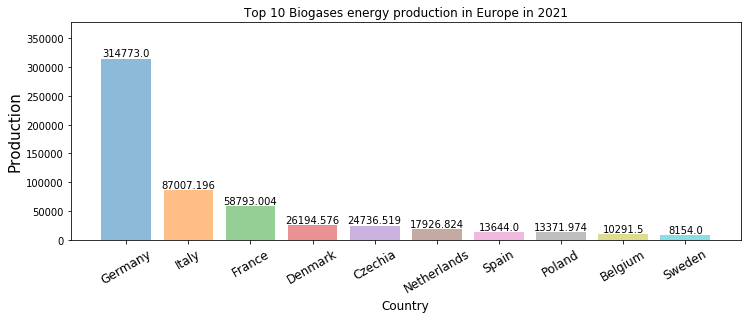

In [13]:
ten_bio, e = getBartChartOfEnergy(Biogases,energy[3])
ten_bio.reverse()

The data show that the geothermal energy production capacity in Germany is much higher than in other countries.

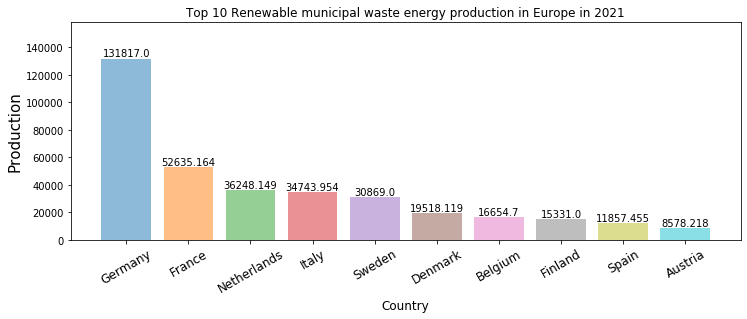

In [14]:
ten_ren,e=getBartChartOfEnergy(waste,energy[4])
ten_ren.reverse()

['Germany', 'Italy', 'France', 'Sweden', 'Finland', 'Poland', 'Spain', 'Austria', 'Czechia', 'Romania']
[1078541.0, 669732.6499999999, 589195.8599999999, 469199.0, 402080.0, 395817.651, 345729.243, 239680.231, 193399.511, 153999.481]


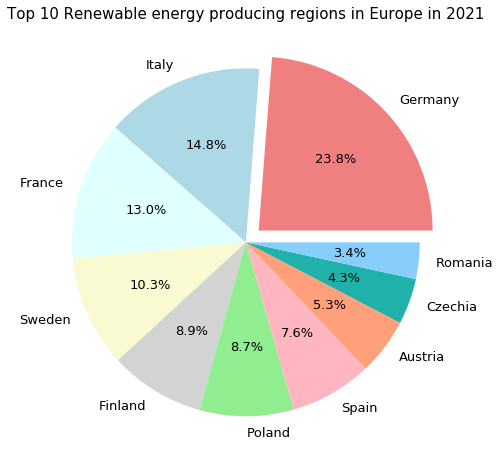

In [15]:
res = waste.add(Solar, fill_value = 0)
res = res.add(Geothermal, fill_value = 0)
res = res.add(solidBiofuels, fill_value = 0)
res = res.add(Biogases, fill_value = 0)


res = res.sort_values(by='Unnamed: 19', ascending=False)
topTen_name = res.iloc[3:13,0].to_list()

fig = plt.figure(figsize=(8, 8),)

for i in range(10):
    if 'Germany' in topTen_name[i]:
        topTen_name[i]='Germany'
        continue
    index = int(len(topTen_name[i])/5)
    topTen_name[i]= topTen_name[i][0:index]
eng = res.iloc[3:13,10].to_list()




colors = ['lightcoral','lightblue','lightcyan','lightgoldenrodyellow','lightgray','lightgreen','lightpink','lightsalmon','lightseagreen','lightskyblue']


explode =[0.0 for i in range(10)]
explode[0]=0.1
patches,l_text,p_text = plt.pie(eng, labels=topTen_name, autopct='%1.1f%%',explode=explode,pctdistance = 0.6,colors=colors)

print(topTen_name)
print(eng)
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
    
plt.title('Top 10 Renewable energy producing regions in Europe in 2021',fontSize=15)

plt.show()

In [16]:
#data clean
res = res.sort_values(by='Unnamed: 19', ascending=False)
topTen_name = res.iloc[3:40,0].to_list()+res.iloc[47:49,0].to_list()
for i in range(len(topTen_name)):
    if 'Germany' in topTen_name[i]:
        topTen_name[i]='Germany'
        continue
    if 'Kosovo' in topTen_name[i]:
        topTen_name[i] = 'Kosovo '
        continue
    index = int(len(topTen_name[i])/5)
    topTen_name[i]= topTen_name[i][0:index]

eng = res.iloc[3:40,10].to_list() + res.iloc[47:49,10].to_list()
max_value = max(eng)
data_dict = {}

for i in range(len(topTen_name)):
    data_dict[topTen_name[i]] = eng[i]

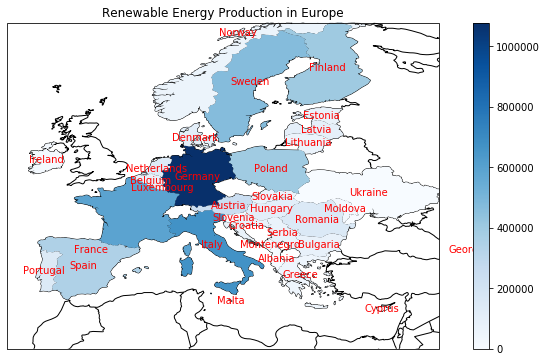

In [17]:
import re
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

crs = ccrs.PlateCarree()

shpfilename = shpreader.natural_earth(resolution='50m', category='cultural',
                                      name='admin_0_countries')
readr = shpreader.Reader(shpfilename)
countries = readr.records()

cmap = plt.cm.get_cmap('Blues')

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-13, 40, 30, 70], crs=ccrs.PlateCarree())


for country in countries:
    name = country.attributes['NAME_LONG']
    match = re.search(r'\b\w+\b', name)
    if match:
        first_word = match.group()
        name = first_word
    
    if name in topTen_name:
        value = data_dict[name]
        if country.geometry.geom_type =='Polygon':
            ax.add_geometries([country.geometry], crs, facecolor=cmap((value+1000)/(max(eng))))
            center = country.geometry.centroid
            ax.text(center.x, center.y, name, ha='center', va='center', fontsize=10,color='r')
        else:
            ax.add_geometries(country.geometry, crs, facecolor=cmap((value+1000)/(max(eng))))
            center = country.geometry.centroid
            ax.text(center.x, center.y, name, ha='center', va='center', fontsize=10,color='r')

plt.title('Renewable Energy Production in Europe')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_value))
sm._A = []
plt.colorbar(sm)

plt.show()

Germany, Italy and France are the three countries with the highest capacity of renewable energy (geothermal, solar, solid biomass, biogas and renewable municipal waste) in Europe, reflecting the active development and investment in renewable energy.

### Top 10 Geothermal energy production in Europe in 2012-2021

[1400.0, 1400.0, 1400.0, 1400.0, 1450.0, 1450.0, 1450.0, 1470.0, 1495.0, 1511.612]
[1525.948, 1527.298, 1319.063, 1459.104, 1473.956, 1699.624, 1628.295, 1422.831, 1524.535, 1533.886]
[2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0]
[291.0, 286.0, 324.0, 373.0, 379.0, 345.1, 392.2, 1942.686, 2451.335, 2092.914]
[495.0, 993.0, 1502.0, 2448.34, 2843.526, 3046.547, 3730.558, 5563.916, 6185.279, 6327.193]
[4490.0, 4721.0, 3800.0, 4426.0, 5026.0, 5590.0, 6005.0, 6611.0, 6274.0, 6552.0]
[5652.0, 7551.0, 7889.0, 7829.0, 6602.0, 8329.235, 8860.932, 8286.804, 8338.915, 6867.684]
[3895.0, 6192.0, 7622.0, 8908.0, 11211.0, 10696.0, 12635.0, 13955.0, 15618.0, 16618.0]
[10126.311, 12728.451, 12252.115, 12704.684, 13989.596, 17700.184, 18223.454, 19268.544, 19978.331, 19441.786]
[207551.0, 210020.0, 219177.0, 228997.0, 233230.0, 230306.799, 226913.897, 225912.383, 223696.664, 219855.666]


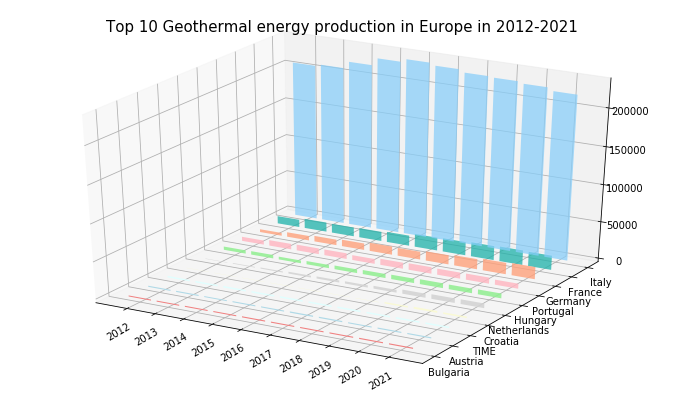

In [18]:
get3dBart(ten_geo,Geothermal,energy[0])

### Top 10 Solar thermal energy production in Europe in 2012-2021

[880.1, 1026.852, 1300.135, 1537.657, 1980.392, 2329.654, 2761.297, 2958.232, 3273.084, 2888.854]
[2700.0, 2751.0, 2796.0, 2841.0, 2887.0, 2939.808, 3015.39, 3062.288, 3113.741, 3167.793]
[620.0, 1035.0, 1455.0, 1885.0, 2189.0, 2280.471, 2383.356, 3008.736, 3355.466, 3566.39]
[2820.0, 3046.0, 3218.0, 3360.0, 3515.0, 3683.031, 3952.566, 4033.172, 4215.771, 4416.237]
[7249.207, 7390.33, 7566.996, 7671.601, 7671.865, 7639.128, 7575.97, 7494.243, 7619.146, 7387.224]
[5646.766, 6077.768, 6444.026, 6715.608, 6948.548, 7207.337, 7582.97, 7843.137, 8145.418, 8453.616]
[6504.0, 7042.0, 7519.0, 7955.0, 8382.0, 8745.962, 9150.878, 9550.429, 9897.752, 10334.595]
[10194.0, 10338.0, 10602.0, 10856.0, 11071.0, 11365.0, 11607.0, 11968.0, 12271.9, 12724.3]
[23902.0, 24123.0, 25942.0, 27743.0, 27695.0, 28273.0, 31950.0, 30538.0, 32057.0, 30415.0]
[70477.824, 87560.016, 99621.256, 102630.919, 103057.269, 108670.446, 92587.496, 106609.84, 95794.589, 99220.719]


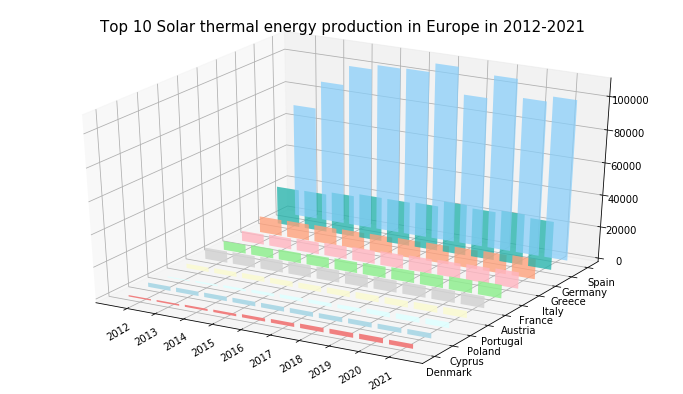

In [19]:
get3dBart(ten_sol,Solar,energy[1])

### Top 10 Primary solid biofuels energy production in Europe in 2012-2021

[158895.0, 153097.0, 152640.0, 147416.0, 149864.0, 149227.273, 144163.94, 144699.779, 142413.764, 151784.548]
[110243.0, 115945.0, 118981.0, 123694.0, 124330.0, 125483.861, 128549.475, 141092.417, 147455.482, 163836.723]
[200153.686, 198316.207, 182911.941, 190421.892, 196330.207, 202624.965, 193229.986, 195403.278, 200866.133, 215496.001]
[213321.0, 217914.0, 216066.0, 220234.0, 202528.0, 208487.0, 206908.0, 210721.0, 211394.0, 220999.0]
[303970.0, 311831.0, 273792.0, 307323.0, 302790.0, 327658.356, 295831.618, 304029.442, 298256.306, 317791.239]
[292562.0, 286243.0, 258723.0, 276199.0, 268577.0, 257952.0, 384913.711, 377056.961, 375316.434, 371823.106]
[331272.0, 338359.0, 339838.0, 330799.0, 348918.0, 358938.0, 362610.0, 361353.0, 332211.0, 378501.0]
[389393.0, 376250.0, 367427.0, 378482.0, 392392.0, 396640.0, 386146.0, 395970.0, 397823.0, 429751.0]
[404761.806, 447026.682, 383174.278, 415171.162, 447957.212, 434068.206, 431737.623, 433745.879, 408845.033, 449872.29]
[588304.0, 5760

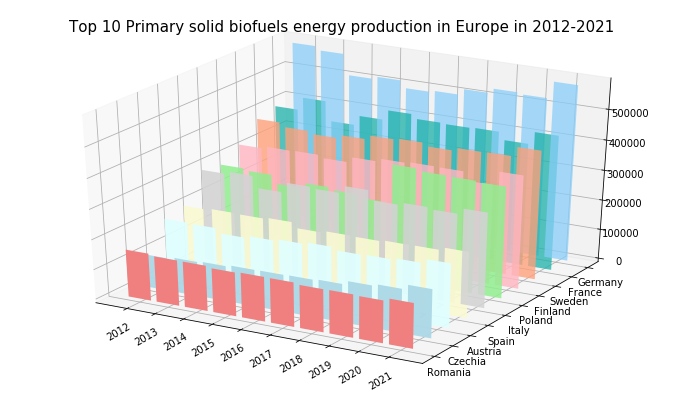

In [20]:
get3dBart(ten_pri,solidBiofuels,energy[2])

### Top 10 Biogases energy production in Europe in 2012-2021

[5303.0, 6070.0, 6422.0, 7009.0, 7265.0, 7445.0, 7359.0, 7600.0, 7780.0, 8154.0]
[6730.0, 8358.6, 9129.9, 9860.4, 9814.4, 9423.1, 9546.6, 9698.0, 10261.4, 10291.5]
[7033.0, 7593.0, 8685.0, 9581.0, 10924.0, 11738.62, 12068.301, 12498.053, 13498.148, 13371.974]
[12179.0, 20072.0, 14791.0, 10954.0, 11557.0, 12237.0, 12374.0, 12184.0, 13539.0, 13644.0]
[12165.0, 12777.0, 13094.0, 13733.059, 13377.41, 13508.671, 13696.226, 14913.297, 17428.542, 17926.824]
[15698.0, 23910.0, 25457.0, 25681.0, 25161.0, 25443.789, 25279.127, 24331.895, 24888.839, 24736.519]
[4399.147, 4587.832, 5561.231, 6285.248, 9047.985, 10906.278, 13333.41, 16481.514, 21151.581, 26194.576]
[21024.115, 24013.607, 25423.321, 28801.248, 31412.412, 33817.19, 36609.292, 40716.538, 45640.314, 58793.004]
[49352.0, 76013.0, 82105.0, 78355.0, 78505.0, 79452.908, 79220.551, 84288.213, 84484.094, 87007.196]
[266005.0, 280646.0, 298275.0, 314418.0, 320998.0, 323250.0, 318527.0, 317935.0, 325115.0, 314773.0]


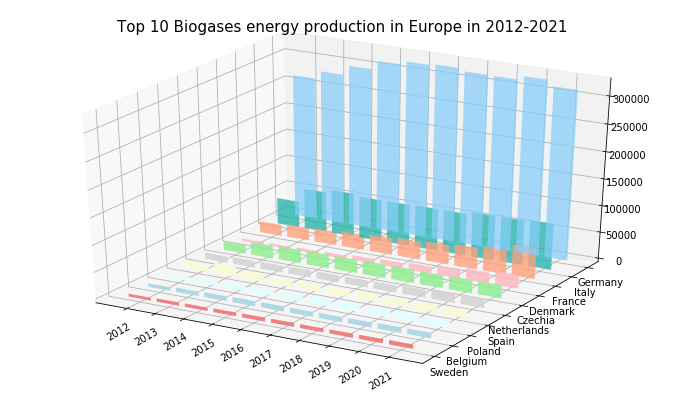

In [21]:
get3dBart(ten_bio,Biogases,energy[3])

### Top 10 Renewable municipal waste energy production in Europe in 2012-2021

[6015.706, 6366.289, 7949.203, 7539.849, 8289.188, 7313.904, 7631.369, 7900.781, 8015.599, 8578.218]
[7355.0, 8362.0, 8549.0, 10551.0, 9849.0, 10871.5, 10640.0, 10706.0, 9884.487, 11857.455]
[8082.0, 9295.0, 10376.0, 11480.0, 12822.0, 13685.0, 14606.0, 14645.0, 13833.0, 15331.0]
[14502.3, 14598.7, 15054.8, 15482.1, 15215.8, 15814.3, 15654.5, 15780.9, 15715.6, 16654.7]
[19591.0, 19214.0, 19402.24, 19396.4, 19210.703, 20173.691, 19561.372, 19638.913, 19542.183, 19518.119]
[29711.0, 31495.0, 32565.0, 34800.0, 31126.0, 32620.0, 30314.0, 32350.0, 35269.0, 30869.0]
[33780.0, 34651.0, 35941.0, 35419.0, 36453.0, 35721.504, 35446.681, 36551.275, 35303.972, 34743.954]
[35759.0, 33445.0, 33251.0, 33895.534, 33224.999, 31998.328, 31257.206, 32153.254, 35028.089, 36248.149]
[50716.634, 52491.509, 52964.619, 51036.094, 52077.274, 52972.997, 52668.316, 52325.601, 51587.606, 52635.164]
[108688.0, 122530.0, 127155.0, 125360.0, 129875.0, 134686.0, 129889.0, 129419.0, 130348.0, 131817.0]


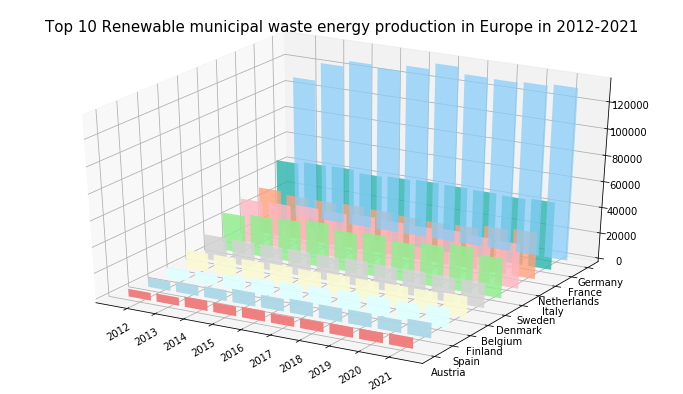

In [22]:
get3dBart(ten_ren,waste,energy[4])

Combining the above data and graphs, it is clear that
Several European countries have made significant progress in the new energy sector in the past decade, such as Germany, Italy and France, where new energy capacity has grown rapidly in the past decade, but in some energy types (such as solar), some other countries (such as Spain and Portugal) have grown at a faster rate.

Geothermal energy has a high potential for development in several European countries and has grown rapidly over the past decade, with countries such as Italy and France experiencing faster growth in geothermal energy capacity.
The development of solar energy is also very important, and countries such as Germany and France are also experiencing rapid growth in solar energy capacity.
Bioenergy capacity such as solid biomass and biogas is also growing to varying degrees in several European countries, such as Germany and Sweden, where solid biomass capacity is growing at a faster rate.
Renewable municipal waste is a relatively small source of energy in several European countries, but it is also growing to some extent in some countries (e.g., Germany and France).

Among the different energy types, there are large differences in the rate and total amount of capacity growth in different countries. This may be related to factors such as the country's economy and policies. For example, economically developed countries such as Germany and Italy have more capital and technology to develop new energy industries, while some Eastern European countries may be limited by factors such as economic backwardness and insufficient policy support.

In conclusion, the European countries have made some progress in the development of renewable energy.